![header](header.png)

# Procesamiento Digital de Señales en Sistemas Embebidos

---

# Actividad 1: Análisis Temporal

## Introducción
Con el fin de obtener máquinas y computadoras con inteligencia similar a la humana es que se utiliza la inteligencia artificial y métodos de Machine Learning (ML), buscando que las computadoras tengan la capacidad de tomar decisiones tal como un humano lo haría. 

Uno de los sentidos más importantes del humano es el sentido del oído. Los humanos pueden clasificar fácilmente entre distintos sonidos sin demasiado esfuerzo, por ejemplo diferenciar entre música y el habla, ruido de un auto o un avión, el habla de un bebe o un adulto, etc. Se pretende que las máquinas puedan realizar esta misma identificación mediante técnicas de ML.
Los sistemas de ML requieren información de entrada robusta y específica que le permita a la máquina aprender de forma rápida y precisa. La cantidad de entrenamiento recibido definirá la “inteligencia” del dispositivo. Normalmente no todo el dataset es presentado a la máquina durante el entrenamiento para aprender sus propiedades. En vez de esto una representación de la señal reducida en tamaño se utiliza para el entrenamiento. Esta representación compacta de la señal se denomina características o “features”.

Para el análisis de señales de audio se pueden utilizar “features” tanto temporales como frecuenciales. La forma más sencilla de analizar la señal es en su forma original, visualizando la señal en el dominio del tiempo, analizando características claves de la señal que permitan utilizarlas en la predicción y análisis de señales similares.

![sketch](sketch.png)

## Consignas
En la carpeta ``ejemplos_python/temporal_analysis`` del Repositorio se dispone de grabaciones de audio (en formato WAV) de distintos acordes grabados a partir de una guitarra. 
A partir de estas señales de audio se pide:

1. Graficar las señales temporales correspondientes a los distintos acordes.
2. De cada uno de los acordes calcular los siguientes parámetros temporales:
    1. Valor medio
    2. Valor máximo
    3. Valor mínimo
    4. Máximo absoluto
    5. Mínimo absoluto
    6. Cantidad de muestras por encima de la media
    7. Cantidad de muestras por debajo de la media
    8. Valor eficaz de la señal (RMS)
    9. Duración temporal de la señal
 

In [2]:
# Incluir librerías
from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython

## Lectura del archivo de audio

In [3]:
filename = 'chord-E'                       # nombre de archivo
fs, data = wavfile.read(f'{filename}.wav') # frecuencia de muestreo y datos de la señal

IPython.display.Audio(data, rate=fs)       # reproductor de audio

Definición de parámetros temporales:

In [4]:
ts = 1 / fs                             # tiempo de muestreo
N = len(data)                           # número de muestras en el archivo de audio
t = np.linspace(0, N * ts, N)           # vector de tiempo
if len(data.shape) > 1:
    senial = data[:, 0]                 # Si el audio es estereo, se extrae un canal de la pista 
else:
    senial = data   
senial = senial * 3300.0 / (2 ** 16 - 1)# se escala la señal a mV (considerando un CAD de 16bits y Vref 3.3V)

## Graficación de la señal

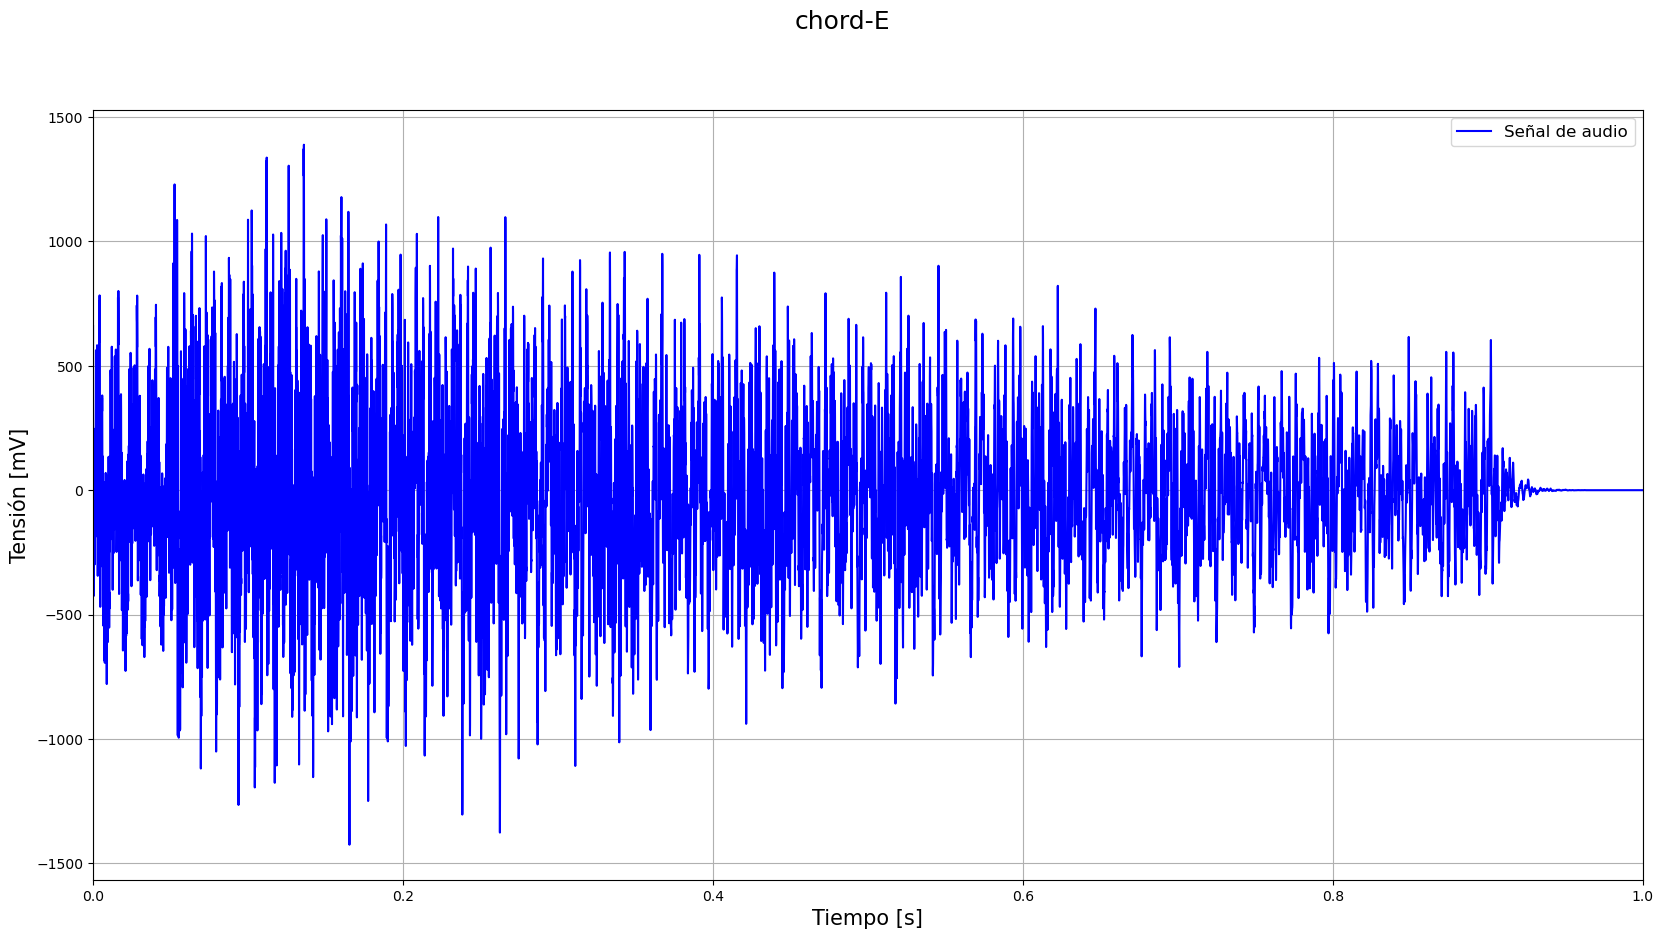

In [5]:
# Se crea una gráfica 
fig1, ax1 = plt.subplots(1, 1, figsize=(20, 10))
fig1.suptitle(filename, fontsize=18)

# Se grafica la señal
ax1.plot(t, senial, label='Señal de audio', color='blue')
ax1.set_xlabel('Tiempo [s]', fontsize=15)
ax1.set_ylabel('Tensión [mV]', fontsize=15)
ax1.set_xlim([0, ts*N])
ax1.grid()
ax1.legend(fontsize=12)
plt.show()

## Cálculo de parámetros temporales

### Valor medio

In [6]:
mean_value = np.mean(senial)

print(f"El valor medio de la señal es de {mean_value:.5f}mV")

El valor medio de la señal es de -0.58946mV


### Máximo

In [7]:
max = np.max(senial)

print(f"El máximo de la señal es de {max:.5f}mV")

El máximo de la señal es de 1388.78462mV


### Mínimo

In [8]:
min = np.min(senial)

print(f"El mínimo de la señal es de {min:.5f}mV")

El mínimo de la señal es de -1425.34218mV


### Máximo absoluto

In [9]:
abs_max = np.max(np.abs(senial))

print(f"El máximo absoluto de la señal es de {abs_max:.5f}mV")

El máximo absoluto de la señal es de 1425.34218mV


### Mínimo absoluto

In [10]:
abs_min = np.min(np.abs(senial))

print(f"El mínimo absoluto de la señal es de {abs_min:.5f}mV")

El mínimo absoluto de la señal es de 0.00000mV


### Muestras por encima de la media

In [11]:
above_mean = np.count_nonzero(np.where(senial>mean_value, True, False))

print(f"La cantidad de muestras por encima de la media es de {above_mean}")

La cantidad de muestras por encima de la media es de 8418


### Muestras por debajo de la media

In [12]:
below_mean = np.count_nonzero(np.where(senial<mean_value, True, False))

print(f"La cantidad de muestras por debajo de la media es de {below_mean}")

La cantidad de muestras por debajo de la media es de 7582


### Valor eficaz (RMS)

In [13]:
rms = np.sqrt(np.mean(np.power((senial-mean_value), 2)))

print(f"El valor eficaz es de {rms:.5f}mV")

El valor eficaz es de 310.39856mV


### Duración de la Señal

#### Detección de envolvente

Se realiza a partir del cálculo del valor RMS de dicha señal sobre una ventana móvil. El ancho de la ventana utilizada es determinado por la variable window.

In [14]:
window = 512        # ancho de ventana

# Se define un arreglo de N elementos de valor 1/N
divisor = [1/window for i in range(window)] 
# Se eleva cada elemento de la señal al cuadrado
x2 = np.power(senial, 2) 
# Se realiza el promedio movil de las señal elevada al cuadrado 
prom_mov = signal.lfilter(divisor, 1, x2)
# Se aplica la raiz cuadrada
env = np.sqrt(prom_mov)
# Se escala al valor máximo de la señal
env = np.sqrt(prom_mov) * max / np.max(env)

#### Cálculo del ancho de la señal

In [15]:
# Detección de picos
picos, _ = signal.find_peaks(env, prominence=max/4)
# Medición del ancho (a la mitad de la amplitu de la señal)
ancho, altura, inicio, fin = signal.peak_widths(env, picos, rel_height=0.75)

print(f"El ancho de la señal es de {(ancho[0]*ts):.5f}seg")

El ancho de la señal es de 0.92318seg


#### Gaficación de la envolvente

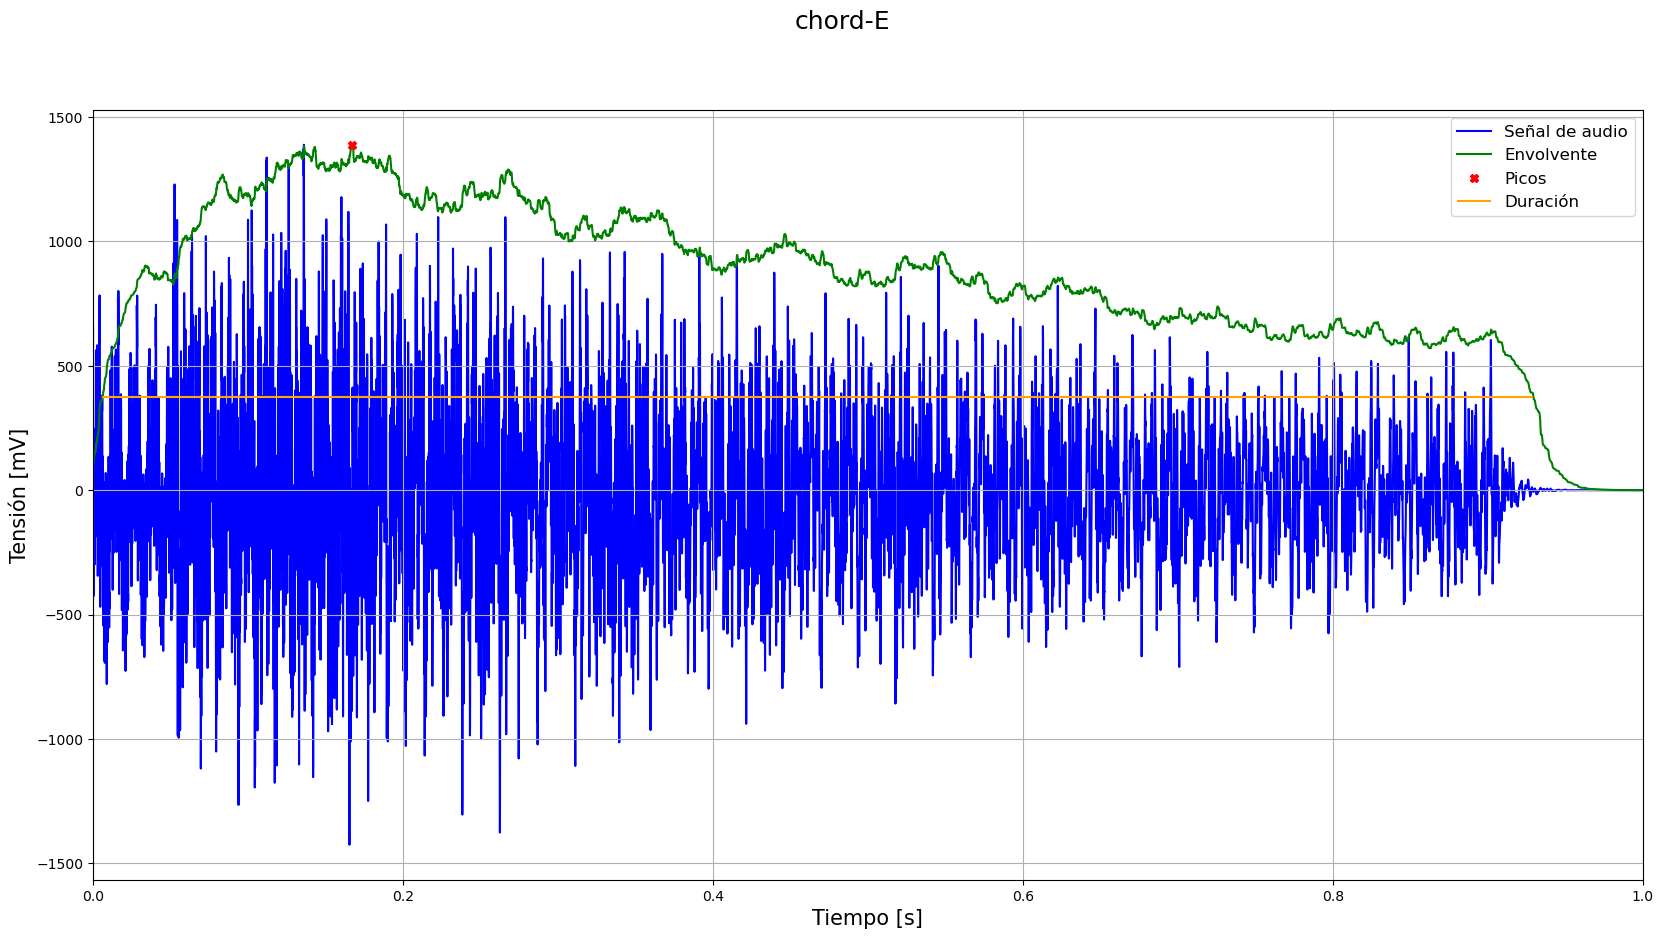

In [16]:
# Se crea una gráfica 
fig2, ax2 = plt.subplots(1, 1, figsize=(20, 10))
fig2.suptitle(filename, fontsize=18)

# Se grafica la señal, su envolvente y se señala la duración del silbido
ax2.plot(t, senial, label='Señal de audio', zorder=1, color='blue')
ax2.plot(t, env, label='Envolvente', zorder=2, color='green')
ax2.plot(t[picos], env[picos], "X", label='Picos', 
         zorder=3, color='red')
ax2.hlines(altura, inicio * ts, fin * ts, label='Duración', 
          zorder=4, color="orange")
ax2.set_xlabel('Tiempo [s]', fontsize=15)
ax2.set_ylabel('Tensión [mV]', fontsize=15)
ax2.set_xlim([0, ts*N])
ax2.grid()
ax2.legend(fontsize=12)
plt.show()


## Generación de .h

Para ser utilizado en el ESP32.

In [126]:
# Guardado
np.savetxt(f"{filename}.h", data, newline=',', 
            header=f'#define N_CHORD {N}\nconst int16_t chord[] ='+' {0',
            footer='};//',
            comments='',
            )